In [12]:
%load_ext autoreload
%autoreload 2
from jupyterthemes import jtplot
jtplot.style()

from ch2.vector_drawing import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Drawing dino vectors

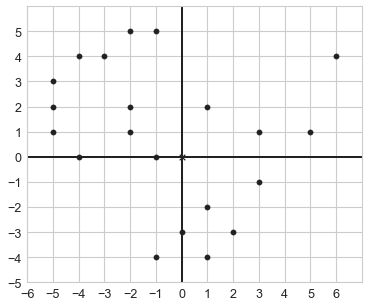

In [14]:

dino_vectors = [ (6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
    (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
    (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1) ]
draw(Points(*dino_vectors))


## Connecting the points using hacky way

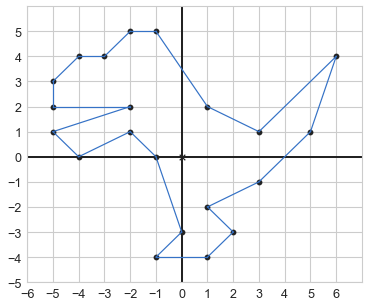

In [6]:
segments = []
for i in range(len(dino_vectors)):
    curr = dino_vectors[i]
    prev = dino_vectors[i - 1]
    segments.append( Segment(curr, prev) )

draw(
    Points(*dino_vectors),
    *segments
)

## Exercise 2.2
Draw the point in the plane and the arrow corresponding to the point (2, -2).

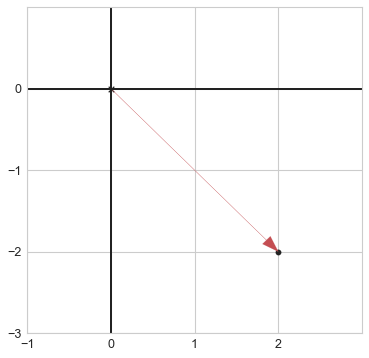

In [15]:
point = (2, -2)
draw(
    Points(point),
    Arrow(point, (0, 0))
)

## Exercise 2.2
Draw the dinosaur with the dots connected by constructing a Polygon object with the dino_vectors
as its vertices.

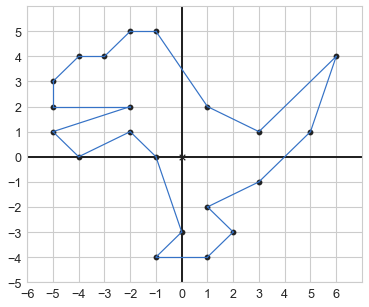

In [8]:
draw(
    Points(*dino_vectors),
    Polygon(*dino_vectors)
)

**Exercise 2.5**: Draw the vectors (x,x**2) for x in the range from x = -10 to x = 11) as points (dots) using the draw
function. What is the result?

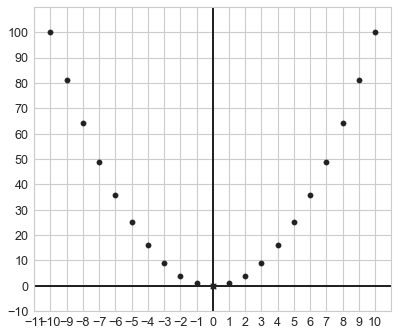

In [9]:
points = [(x, x ** 2)  for x in range(-10, 11)]
draw(Points(*points), grid= (1, 10), nice_aspect_ratio=False)

# 2.2

## Adding vectors

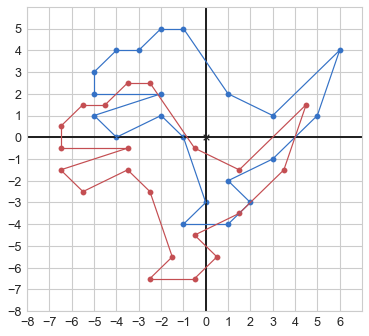

In [13]:
def add(v1, v2):
    return v1[0] + v2[0], v1[1] + v2[1]

dino_vectors2 = [add((-1.5, -2.5), v) for v in dino_vectors]
draw(
    Points(*dino_vectors, color=blue),
    Polygon(*dino_vectors, color=blue),
    Points(*dino_vectors2, color=red),
    Polygon(*dino_vectors2, color=red)
)

## Distances

In [16]:
from math import sqrt
def length(v):
    return sqrt( v[0]**2 + v[1]**2)

**Exercise 2.6**: If the vector u = (-2, 0), the vector v = (1.5, 1.5), and the
vector w = (4, 1), what are the results of u + v, v +
w, and u + w? What is the result of u + v + w?

In [17]:
u = (-2, 0)
v = (1.5, 1.5)
w = (4, 1)

uPlusV = add(u, v)
print(uPlusV)
vPlusW = add(v, w)
print(vPlusW)
uPlusW = add(u, w)
print(uPlusW)

uPlusVPlusW = add( add(u, v), w )
print(uPlusVPlusW)

(-0.5, 1.5)
(5.5, 2.5)
(2, 1)
(3.5, 2.5)


**Mini-project 2.7**: You can add any number of vectors together by summing all of their x-coordinates and all of their y-
coordinates. For instance, the fourfold sum (1, 2) + (2, 4) + (3, 6) + (4, 8) has x component 1 + 2 + 3 + 4 = 10 and y
component 2 + 4 + 6 + 8 = 20, making the result (10, 20). Implement a revised add function that takes any number of
vectors as arguments.

In [31]:
def add(*vectors):
    allX = [v[0] for v in vectors]
    allY = [v[1] for v in vectors]
    return sum(allX), sum(allY)

print(add(u, v, w))

(3.5, 2.5)


**Exercise 2.8:** Write a function translate(translation, vectors) that takes a translation vector and a list of
input vectors, and returns a list of the input vectors all translated by the translation vector. For instance,
translate((1,1), [(0,0), (0,1,), (-3,-3)]) should return [(1,1),(1,2),(-2,-2)].

In [32]:
def translate(translation, vectors):
    return [add(translation, v) for v in vectors]

print(translate((1,1), [(0,0), (0,1,), (-3,-3)]))


[(1, 1), (1, 2), (-2, -2)]
